In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('/content/full_data_flightdelay.csv')

In [5]:
# encode strings into int
le = LabelEncoder()
df['CARRIER_ENCODED'] = le.fit_transform(df['CARRIER_NAME'])

### Features and Target

In [6]:
X = df[['MONTH', 'CARRIER_ENCODED','SEGMENT_NUMBER','PLANE_AGE']]
y = df.DEP_DEL15

### Split the data into train and test

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

###  Train and test model


In [8]:
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [9]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [-1.56370759]
Coefficients [[ 0.05831601  0.05303881  0.23201364 -0.01035636]]


In [ ]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

### Plot the Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

In [ ]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

### Split the data according to a demographic variable

In [11]:
#create new dataframe containing planes less than or equal to 16 years of age
df_young = df.copy()
df_young = df[df['PLANE_AGE'] > 16]
df_young.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_ENCODED
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,6
20,1,7,0,0600-0659,8,1,27,187,American Airlines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,2
22,1,7,0,0800-0859,3,1,25,142,United Air Lines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,16
24,1,7,1,1000-1059,3,1,29,142,United Air Lines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,16
26,1,7,0,0700-0759,1,1,29,154,United Air Lines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,16


In [12]:
#create new dataframe containing planes more than 16 years of age
df_old = df.copy()
df_old = df[df['PLANE_AGE'] < 17]
df_old.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_ENCODED
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,14
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,6
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,6
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,15
5,1,7,0,0001-0559,3,1,10,180,Frontier Airlines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,8


### Steps 4, 5, 6 for df_young

In [13]:
X = df_young[['MONTH', 'CARRIER_ENCODED','SEGMENT_NUMBER','PLANE_AGE']]
y = df_young.DEP_DEL15

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [15]:
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [16]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [-1.62485126]
Coefficients [[ 0.05575398  0.14948141  0.16133154 -0.04081564]]


In [17]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.8338567577332481
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     30003
           1       0.00      0.00      0.00      5978

    accuracy                           0.83     35981
   macro avg       0.42      0.50      0.45     35981
weighted avg       0.70      0.83      0.76     35981



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[30003,     0],
       [ 5978,     0]])

Text(0.5, 427.9555555555555, 'Predicted')

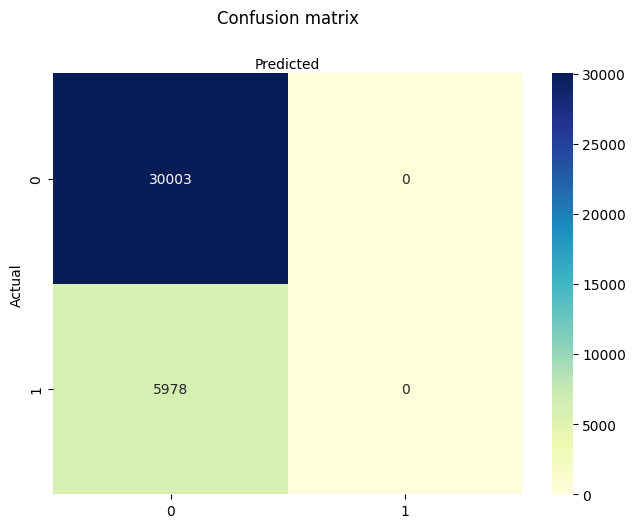

In [19]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

### Steps 4, 5, 6 for df_old

In [20]:
X = df_old[['MONTH', 'CARRIER_ENCODED','SEGMENT_NUMBER','PLANE_AGE']]
y = df_old.DEP_DEL15

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [22]:
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [23]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [-1.54175816]
Coefficients [[0.0550802  0.00527385 0.24772142 0.03664675]]


In [24]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.8203863009251745
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     75820
           1       0.17      0.00      0.00     16595

    accuracy                           0.82     92415
   macro avg       0.49      0.50      0.45     92415
weighted avg       0.70      0.82      0.74     92415



In [25]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[75815,     5],
       [16594,     1]])

Text(0.5, 427.9555555555555, 'Predicted')

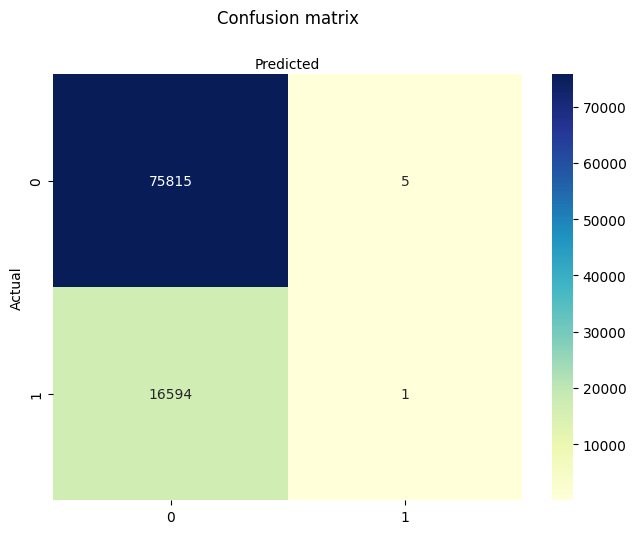

In [26]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')